<a href="https://colab.research.google.com/github/aulia-anhar/capstone-obesity-prediction/blob/main/obesity-calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Obesity Classification with Machine Learning**

# **1. Exploratory Data Analysis (EDA)** 
### A. Impor Library & Load Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Tampilkan semua kolom saat dipanggil
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('C:/Users/Anhar/Documents/#semester 6/Bengkod/capstone-obesity-prediction/dataset/ObesityDataSet.csv')

# Tampilkan 5 baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


### B. Informasi Umum Dataset

In [4]:
# Informasi jumlah baris, kolom, dan tipe data
print("Informasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [5]:
# Deskripsi statistik (khusus data numerik)
print("\nDeskripsi Statistik:")
df.describe()



Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


### C. Cek Missing Values, Unique Values, dan Duplikat

In [6]:
# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [7]:
# Cek nilai unik tiap kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [8]:
# Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
18


### D. Visualisasi Data

**4.1 Korelasi antar fitur numerik**

mengonversi kolom-kolom numerik seperti Age, Height, Weight, CH2O, FAF, dan TUE ke tipe float. dengan melakukan langkah-langkah berikut:

1. Mengonversi kolom numerik ke float.

2. Menghapus baris yang gagal dikonversi (jika ada).

3. Menampilkan heatmap korelasi antar fitur numerik.


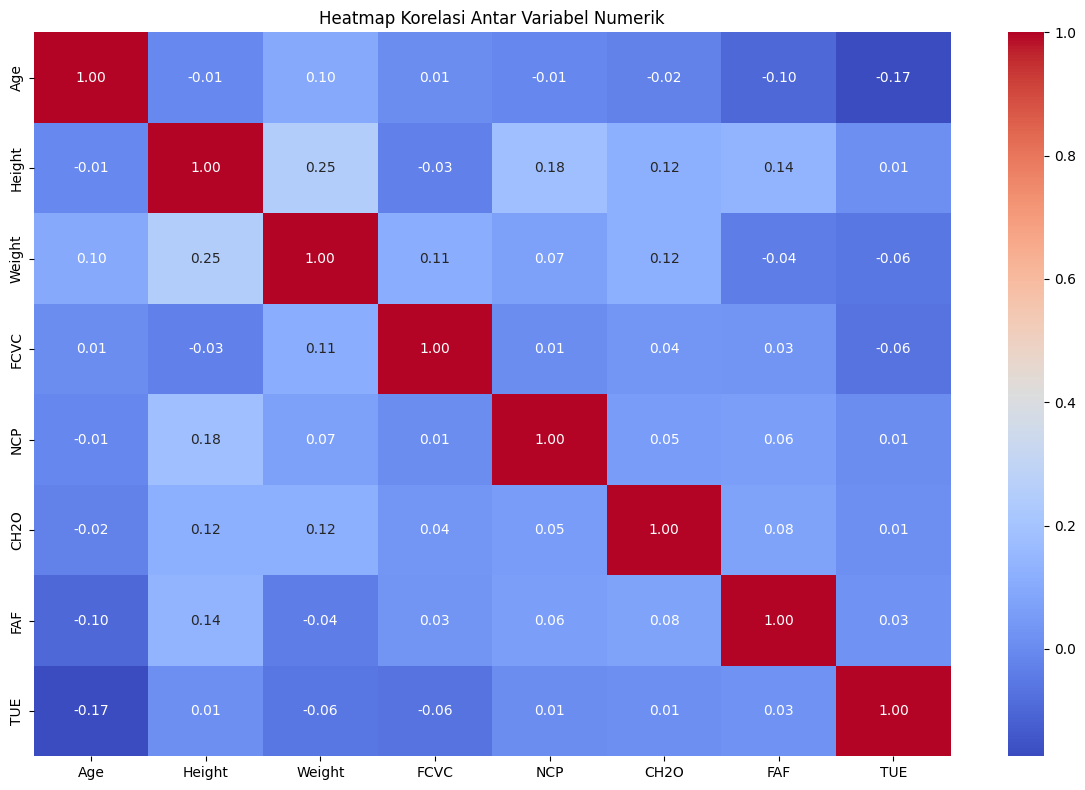

In [9]:
# 4.1 Korelasi antar fitur numerik

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang akan dikonversi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom ke float
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop baris dengan nilai NaN (hasil konversi gagal)
df_cleaned = df.dropna(subset=numeric_columns)

# Korelasi dan heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.tight_layout()
plt.show()



**4.2 Distribusi Kelas (Target Balance)**

> Add blockquote



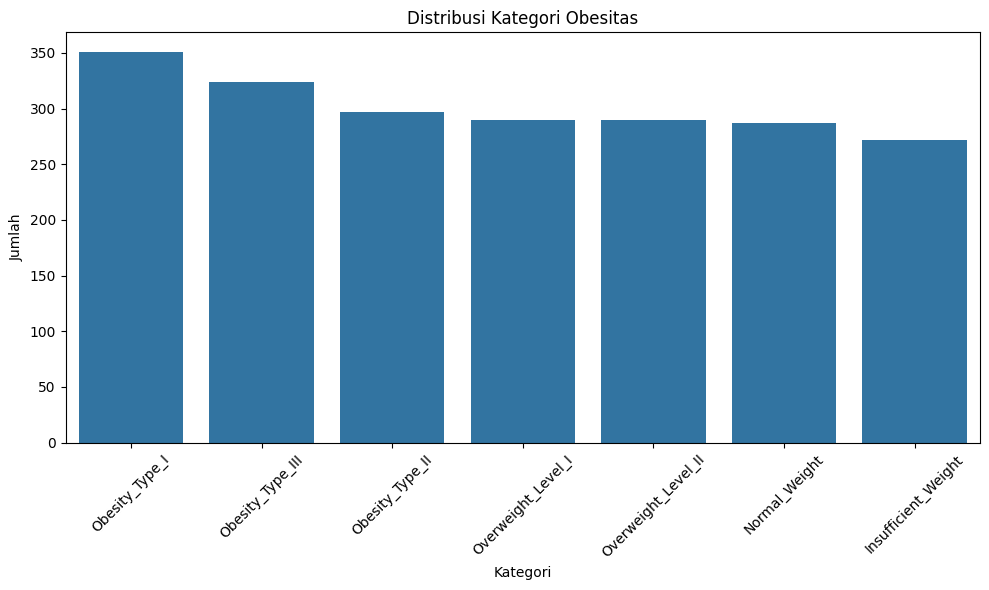

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


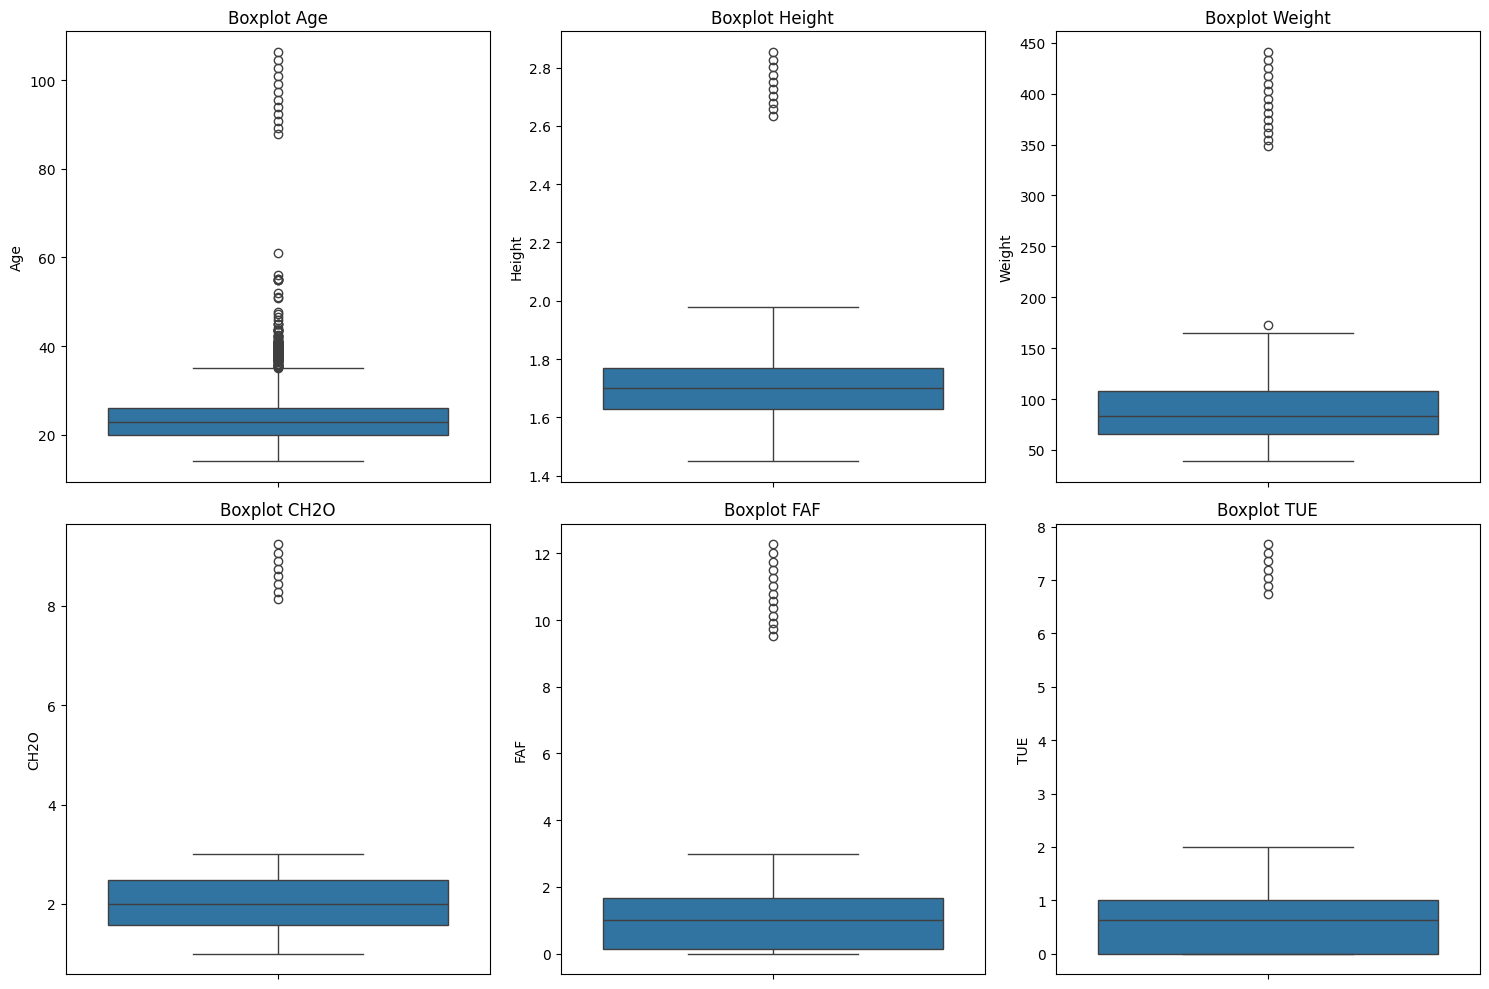

In [11]:
# Kolom numerik kontinu untuk deteksi outlier
numeric_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


# **Hasil Proses Exploratory Data Analysis (EDA)**

**1. Informasi Umum Dataset**

*   Jumlah entri: 2111 baris
*   Jumlah kolom: 17
*   Semua kolom bertipe object, yang berarti data numerik seperti Age, Height, dan Weight masih berupa string dan perlu dikonversi ke tipe numerik untuk analisis lebih lanjut.
*   Beberapa kolom memiliki nilai hilang (missing values).

**2. Statistik Deskriptif Kolom Numerik**

* Nilai-nilai ini tidak dapat dihitung sekarang karena semua kolom numerik masih dalam format object. Namun, berdasarkan ringkasan:

* Terdapat ribuan nilai unik dalam kolom numerik seperti Height dan Weight, menandakan data belum dibersihkan atau dikonversi ke tipe yang sesuai.

**3. Missing Values**

Kolom dengan nilai kosong (missing):

* Age, Height, Weight, FCVC, NCP, SCC, CH2O, FAF, TUE, MTRANS, dan lainnya memiliki sejumlah kecil nilai kosong (rata-rata kurang dari 20 dari 2111 baris).

* Tidak terlalu signifikan, namun perlu penanganan (misalnya imputasi).


 **4. Nilai Unik**

Beberapa kolom memiliki jumlah nilai unik yang sangat besar (ribuan), seperti:

* Age: 1394 nilai unik

* Height: 1562 nilai unik

* Weight: 1518 nilai unik

Hal ini menunjukkan kemungkinan Nilai desimal disimpan sebagai string dan Inkonsistensi format Sehingga Perlu konversi ke float dan standarisasi

**5. Duplikat**

Tidak ditemukan data duplikat pada dataset ini.

**6. Distribusi Kelas (Target: NObeyesdad)**

Distribusi kategori obesitas:

* Obesity Type I: 351

* Obesity Type III: 324

* Obesity Type II: 297

* Overweight Level I & II: 290 masing-masing

* Normal Weight: 287

* Insufficient Weight: 272

Distribusi relatif seimbang, artinya tidak ada dominasi kelas yang ekstrem — kondisi ideal untuk model klasifikasi.

**7. Deteksi Outlier**

Statistik deskriptif pada fitur numerik belum tersedia sepenuhnya karena semua masih dalam tipe object. Namun, berdasarkan frekuensi:

Banyak nilai duplikat seperti 80, 1.7, dan 18 muncul sering. Perlu konversi ke float dan eksplorasi lanjut untuk membuat boxplot dan mendeteksi outlier.




# **Kesimpulan EDA Sementara**

1. Dataset relatif bersih dari duplikasi dan cukup seimbang secara label target.

2. Banyak fitur numerik masih dalam format teks (object) — perlu dikonversi agar bisa digunakan untuk visualisasi dan pemodelan.

3. Missing values kecil dan bisa diimputasi dengan rata-rata atau median.

4. Perlu proses pembersihan data sebelum melakukan visualisasi lanjutan dan training model.

5. Visualisasi Data

* **Korelasi Antar Variabel Numerik**
  menunjukan Tidak ada hubungan linear yang dominan antara fitur numerik, sehingga untuk prediksi, perlu mempertimbangkan model non-linear atau teknik feature engineering lainnya.

* **Distribusi Kategori Obesitas**
  menunjukan Dataset ini cukup seimbang antar kelas target, yang baik untuk klasifikasi karena tidak terlalu bias terhadap satu kategori.

* **Boxplot Variabel Numerik**
  Perlu dilakukan penanganan outlier, terutama pada Weight, Age, dan FAF, karena dapat memengaruhi hasil model prediktif secara signifikan



# **2. Preprocessing Data**

### A.  Hapus Missing Values dan Duplikasi

Tujuan:
Membersihkan data dari nilai kosong dan baris yang identik/duplikat.
Data yang duplikat atau kosong dapat mempengaruhi hasil pelatihan model. Oleh karena itu, kita hapus data tersebut agar hasil analisis lebih lebih baik.

Metode:

drop_duplicates() → menghapus baris ganda

dropna() → menghapus baris yang memiliki nilai kosong



In [12]:
# Hapus duplikat dan missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(f"Jumlah baris setelah bersih: {df.shape[0]}")

# Cek missing values
missing_values = df.isnull().sum()





Jumlah baris setelah bersih: 1871


### B. Tangani Outlier (Metode IQR)

Tujuan:
Menghapus nilai-nilai ekstrim (outlier) yang bisa merusak hasil pelatihan model. Outlier adalah nilai yang jauh lebih tinggi atau lebih rendah dari data lain, seperti usia 200 tahun. Kita gunakan metode IQR untuk menghapus outlier dari kolom numerik agar data menjadi lebih stabil.

Metode:

IQR (Interquartile Range) → metode statistik untuk mendeteksi dan menghapus nilai yang terlalu jauh dari jangkauan normal. dengan rumus :

IQR = Q3 - Q1
Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR


In [13]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df = remove_outliers_iqr(df, numeric_cols)

print(f"Jumlah baris setelah menghapus outlier: {df.shape[0]}")


Jumlah baris setelah menghapus outlier: 1170


###  C Encoding Data Kategorikal (Ubah Data Kategorikal Menjadi Numerik)

Tujuan:
Mengubah data yang berbentuk teks (kategori) menjadi angka agar bisa diproses oleh algoritma machine learning.

Metode:

Label Encoding dengan LabelEncoder() dari sklearn.preprocessing

Penjelasan:
Model machine learning hanya bisa memproses angka. Jadi kita ubah data kategori (seperti gender, kebiasaan makan, dll.) menjadi angka. Misalnya, Male jadi 1 dan Female jadi 0.

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Kolom kategorikal telah diencoding.")

# Tampilkan beberapa data setelah pembersihan
df_cleaned.head()


Kolom kategorikal telah diencoding.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1,1.62,64.0,3,1,2.0,3.0,1,1,2.0,2,0.0,1.0,3,4,1
1,21.0,1,1.52,56.0,2,1,3.0,3.0,2,2,3.0,2,3.0,0.0,3,4,1
2,23.0,2,1.80,77.0,1,1,2.0,3.0,1,1,2.0,2,2.0,1.0,3,4,1
3,27.0,2,1.80,87.0,1,1,3.0,3.0,1,1,2.0,1,2.0,0.0,3,5,5
5,29.0,2,1.62,53.0,2,2,2.0,3.0,1,1,2.0,1,0.0,0.0,3,1,1


###  D. Pisahkan Fitur dan Target

Tujuan:
Memisahkan fitur (X) sebagai input dan target (y) sebagai label yang akan diprediksi oleh model.

Metode:

X = df.drop('target')

y = df['target']

Penjelasan:
Kita pisahkan data menjadi:

X: semua kolom kecuali NObeyesdad (fitur yang digunakan untuk memprediksi)

y: kolom NObeyesdad (kelas atau label yang ingin diprediksi)

In [15]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

print("Fitur dan target telah dipisahkan.")


Fitur dan target telah dipisahkan.


### E. Atasi Imbalanced Class dengan SMOTE

 Tujuan:
Menyamakan jumlah data di setiap kelas target agar model tidak berat sebelah.

Metode:

SMOTE (Synthetic Minority Over-sampling Technique)
Teknik ini membuat data sintetis untuk kelas yang jumlahnya sedikit.

Penjelasan:
Jika kelas Obesity_Type_III jauh lebih sedikit daripada kelas Normal_Weight, maka model bisa bias. Dengan SMOTE, kita menambah data sintetis dari kelas minoritas untuk menyeimbangkan dataset.


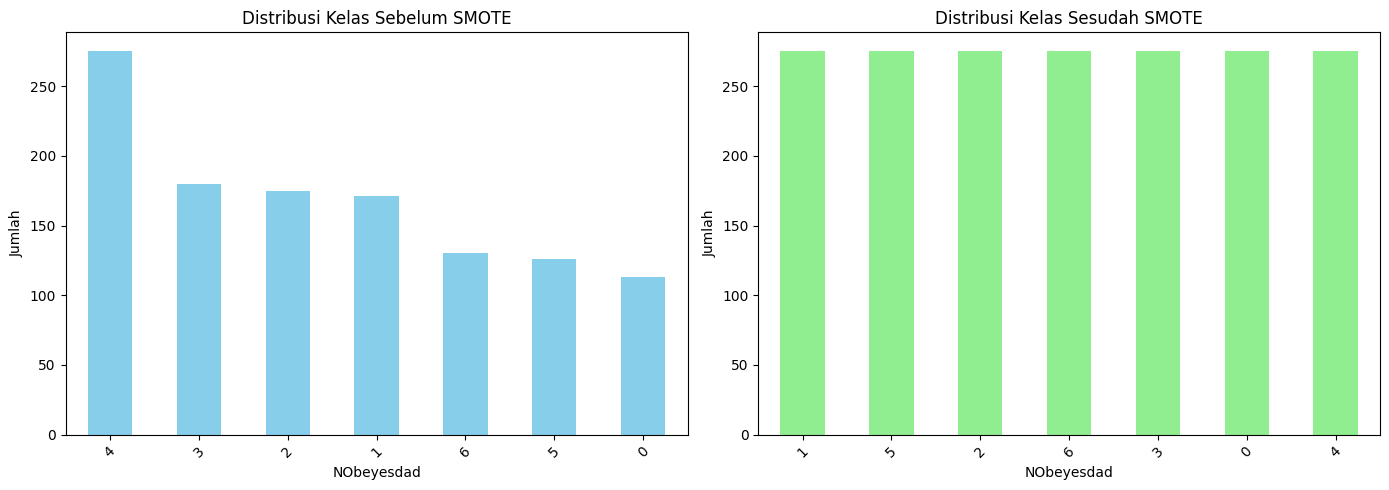

In [24]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Asumsikan df_cleaned adalah dataframe bersih (tanpa missing & duplikat)
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=["NObeyesdad"])
y = df_cleaned["NObeyesdad"]

# Ubah semua fitur kategori menjadi numerik
X_encoded = pd.get_dummies(X, drop_first=True)

# SMOTE hanya bisa dilakukan pada data numerik
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Hitung distribusi kelas sebelum dan sesudah
before_counts = y.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

before_counts.plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Distribusi Kelas Sebelum SMOTE")
axes[0].set_ylabel("Jumlah")
axes[0].tick_params(axis='x', rotation=45)

after_counts.plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Distribusi Kelas Sesudah SMOTE")
axes[1].set_ylabel("Jumlah")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### F. Normalisasi / Standardisasi Data

 Tujuan:
Menyamakan skala semua fitur agar model bisa mempelajari data secara seimbang.

Metode:

StandardScaler dari sklearn.preprocessing
Mengubah nilai fitur agar memiliki rata-rata 0 dan standar deviasi 1.

Penjelasan:
Beberapa fitur seperti tinggi dan waktu aktivitas punya skala berbeda. Jika tidak disamakan, fitur dengan nilai besar bisa mendominasi. Dengan standarisasi, semua fitur menjadi seimbang untuk diproses model.

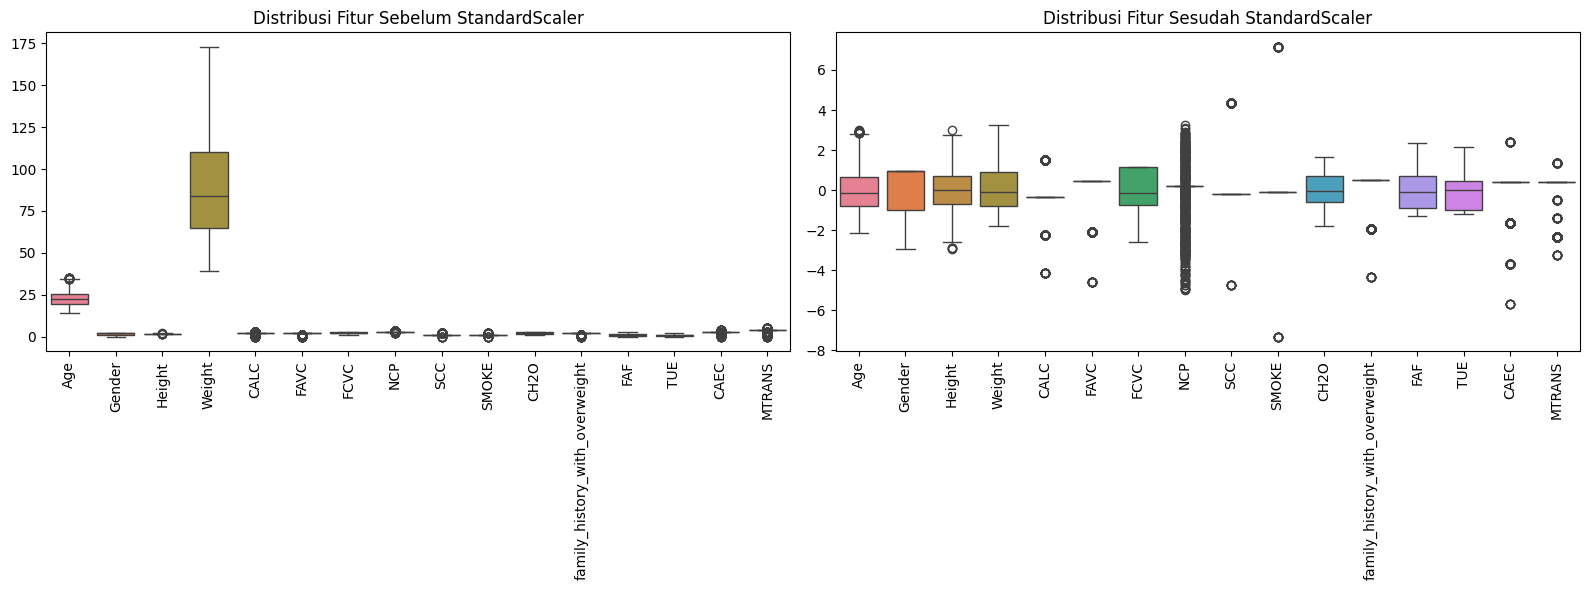

In [25]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Konversi kembali ke DataFrame untuk kemudahan visualisasi
X_before = pd.DataFrame(X_resampled, columns=X.columns)
X_after = pd.DataFrame(X_scaled, columns=X.columns)

# Visualisasi distribusi nilai fitur sebelum dan sesudah standarisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=X_before, ax=axes[0])
axes[0].set_title("Distribusi Fitur Sebelum StandardScaler")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=X_after, ax=axes[1])
axes[1].set_title("Distribusi Fitur Sesudah StandardScaler")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Simpan hasil akhir
X_final = X_after
y_final = y_resampled


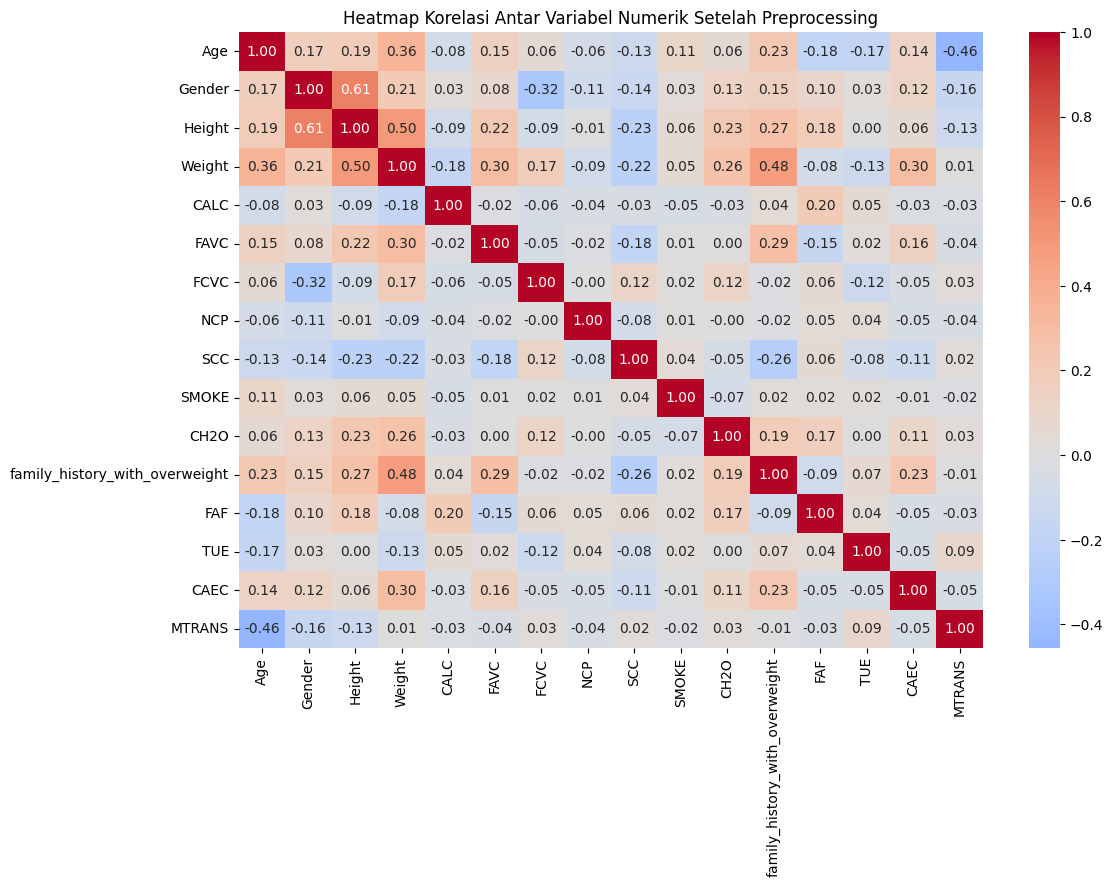

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Jika X_final masih dalam bentuk array NumPy, pastikan dikonversi ke DataFrame
if not isinstance(X_final, pd.DataFrame):
    X_final = pd.DataFrame(X_final, columns=X.columns)

# Hitung korelasi antar fitur numerik
corr_matrix_after = X_final.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_after, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Variabel Numerik Setelah Preprocessing')
plt.show()
